In [1]:
# file_path = "flower_images/flower_images/"
file_path = "/home/topister/Desktop/ML/Data mining/Clustering/newImages/flower_images/flower_images"


In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

2024-02-09 00:10:58.041529: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 00:10:58.094585: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 00:10:58.094623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 00:10:58.095961: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-09 00:10:58.106997: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 00:10:58.107601: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
os.chdir(file_path)

In [4]:
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(file_path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [5]:
print(flowers[:10])

['0061.png', '0096.png', '0028.png', '0055.png', '0112.png', '0024.png', '0043.png', '0059.png', '0103.png', '0159.png']


In [6]:
# creates a ScandirIterator aliased as files
with os.scandir(file_path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [7]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input

In [8]:
# Load MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

In [9]:
# model = VGG16()
# model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [10]:
# Save the entire model using pickle
import pickle

with open('features.pkl', 'wb') as file:
    pickle.dump(model, file)

In [11]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features


In [12]:
data = {}

In [13]:
p = r"/home/topister/Desktop/ML/Data mining/Clustering/newImages/saved_flowers"


In [14]:
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

1/1 [==============================] - 0s 45ms/step


In [15]:
filenames = np.array(list(data.keys()))

In [16]:
feat = np.array(list(data.values()))


In [17]:
# feat = feat.reshape(-1,4096)

# Get the shape of the features
feature_shape = feat.shape[1:]

# Reshape the features
feat = feat.reshape(-1, np.prod(feature_shape))



In [18]:
print(feat.shape)

(210, 62720)


In [19]:
df = pd.read_csv("/home/topister/Desktop/ML/Data mining/Clustering/newImages/flower_images/flower_images/flower_labels.csv")
label = df['label'].tolist()
unique_labels = list(set(label))

In [20]:
# pca = PCA(n_components=100, random_state=22)
# pca.fit(feat)
# x = pca.transform(feat)

if feat.shape[0] > 0 and feat.shape[1] > 1:
    # Perform PCA
    pca = PCA(n_components=100, random_state=22)
    pca.fit(feat)
    x = pca.transform(feat)
else:
    print("No data available for PCA. Check the feature extraction process.")


In [21]:
print("Shape of feat:", feat.shape)


Shape of feat: (210, 62720)


In [22]:
# kmeans = KMeans(n_clusters=len(unique_labels),n_jobs=-1, random_state=22)
# kmeans.fit(x)


from sklearn.cluster import KMeans

# Your code for PCA transformation (assuming 'x' is your transformed data)

kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)  # Use n_jobs here if you want to parallelize: kmeans.fit(x, n_jobs=-1)


/home/topister/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=22)

In [23]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [24]:
groups[0]

['0028.png',
 '0074.png',
 '0162.png',
 '0100.png',
 '0105.png',
 '0141.png',
 '0054.png',
 '0163.png',
 '0150.png',
 '0071.png',
 '0092.png',
 '0084.png',
 '0098.png',
 '0171.png',
 '0131.png',
 '0038.png',
 '0119.png',
 '0204.png',
 '0174.png',
 '0143.png',
 '0041.png',
 '0160.png',
 '0168.png',
 '0202.png',
 '0121.png',
 '0169.png',
 '0170.png',
 '0155.png',
 '0156.png',
 '0073.png',
 '0194.png',
 '0104.png']

In [25]:
groups[1]

['0061.png',
 '0043.png',
 '0179.png',
 '0192.png',
 '0021.png',
 '0003.png',
 '0122.png',
 '0072.png',
 '0164.png',
 '0180.png',
 '0069.png',
 '0063.png',
 '0166.png',
 '0146.png',
 '0106.png',
 '0053.png',
 '0029.png',
 '0014.png',
 '0199.png',
 '0091.png',
 '0047.png',
 '0190.png',
 '0153.png',
 '0023.png',
 '0027.png',
 '0139.png',
 '0015.png',
 '0203.png',
 '0051.png',
 '0151.png',
 '0184.png',
 '0127.png',
 '0102.png']

In [26]:
groups[2]

['0030.png',
 '0026.png',
 '0032.png',
 '0138.png',
 '0010.png',
 '0013.png',
 '0004.png',
 '0056.png',
 '0067.png',
 '0206.png',
 '0005.png',
 '0002.png',
 '0012.png',
 '0089.png',
 '0118.png',
 '0018.png',
 '0130.png',
 '0197.png',
 '0209.png',
 '0077.png',
 '0116.png',
 '0187.png',
 '0207.png']

In [27]:
groups[3]

['0112.png',
 '0024.png',
 '0103.png',
 '0140.png',
 '0142.png',
 '0022.png',
 '0088.png',
 '0152.png',
 '0052.png',
 '0090.png',
 '0070.png',
 '0134.png',
 '0113.png',
 '0148.png',
 '0087.png',
 '0191.png',
 '0205.png',
 '0167.png',
 '0208.png',
 '0178.png',
 '0132.png',
 '0145.png',
 '0123.png',
 '0039.png',
 '0082.png',
 '0046.png',
 '0200.png',
 '0094.png']

In [28]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [29]:
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)

    sse.append(km.inertia_)

/home/topister/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/topister/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/topister/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/topister/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/topister/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/topister/.local/li

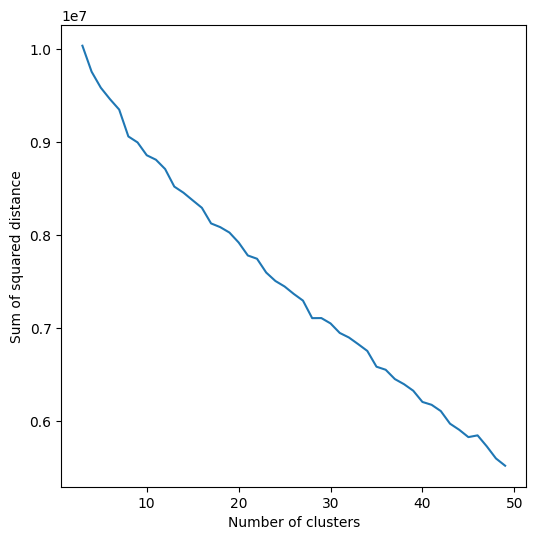

In [30]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance');